In [154]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
df=pd.read_csv('Telecom_cust_churn.csv')

**Understanding the Data**


In [155]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [156]:
df.shape

(7043, 21)

In [157]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [158]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

In [159]:
df.describe(include=object).T

,count,unique,top,freq
customerID,7043,7043,7590-VHVEG,1
gender,7043,2,Male,3555
Partner,7043,2,No,3641
Dependents,7043,2,No,4933
PhoneService,7043,2,Yes,6361
MultipleLines,7043,3,No,3390
InternetService,7043,3,Fiber optic,3096
OnlineSecurity,7043,3,No,3498
OnlineBackup,7043,3,No,3088
DeviceProtection,7043,3,No,3095


**Data Manipulation**

In [160]:
df = df.drop(['customerID'], axis = 1)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [161]:
df['TotalCharges'] = pd.to_numeric(df.TotalCharges, errors='coerce')
df.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [162]:
df=df.fillna(df['TotalCharges'].mean())
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [163]:
df.duplicated().sum()

22

In [164]:
df.drop_duplicates(inplace=True)

In [165]:
df.duplicated().sum()

0

In [166]:
df["SeniorCitizen"]= df["SeniorCitizen"].map({0: "No", 1: "Yes"})
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,No,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [167]:
df[df['tenure'] == 0].index

Index([488, 753, 936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754], dtype='int64')

In [168]:
indices = [488, 753, 936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754]
values = df.loc[indices, 'MonthlyCharges'].tolist()

print(values)


[52.55, 20.25, 80.85, 25.75, 56.05, 19.85, 25.35, 20.0, 19.7, 73.35, 61.9]


In [169]:
#we are dropping rows that have tenure value as zero by considering them as missing values as there are MonthlyCharges even with zero tenure

In [170]:
df.drop(labels=df[df['tenure'] == 0].index, axis=0, inplace=True)

**OUTLIER ANALYSIS**

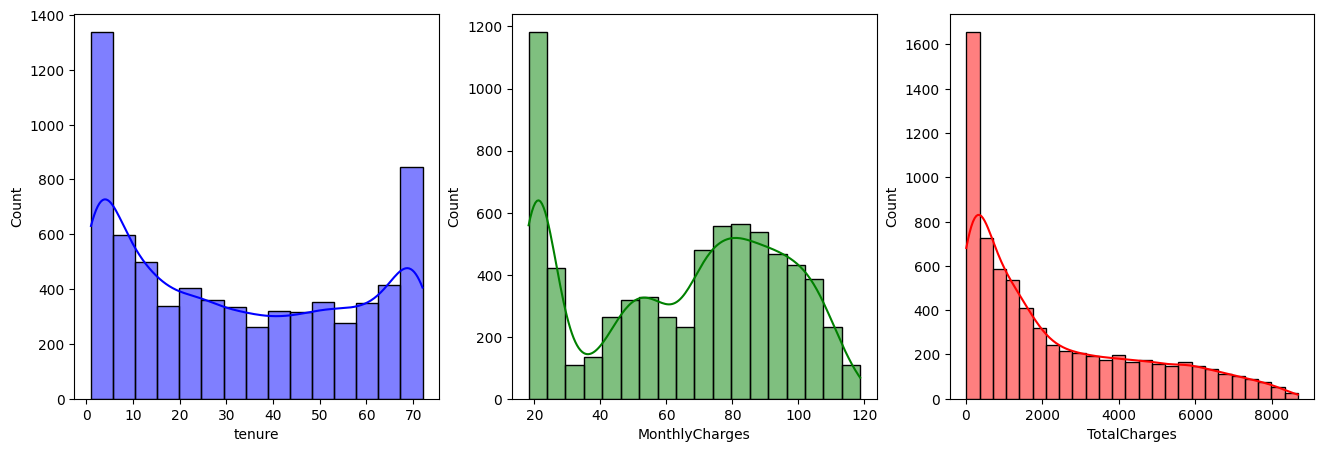

In [171]:
plt.figure(figsize=(16,5))
plt.subplot(1,3,1)
sns.histplot(df['tenure'],kde=True,color='blue')
plt.subplot(1,3,2)
sns.histplot(df['MonthlyCharges'],kde=True,color='green')
plt.subplot(1,3,3)
sns.histplot(df['TotalCharges'],kde=True,color='red')
plt.show()

In [172]:
def detect_outliers(d):
  for i in d:
    Q3, Q1 = np.percentile(df[i], [75 ,25])
    IQR = Q3 - Q1

    ul = Q3+1.5*IQR
    ll = Q1-1.5*IQR

    outliers = df[i][(df[i] > ul) | (df[i] < ll)]
    print(f'* {i} outlier points***', '\n', outliers, '\n')
detect_outliers(['tenure', 'MonthlyCharges', 'TotalCharges'])

* tenure outlier points*** 
 Series([], Name: tenure, dtype: int64) 

* MonthlyCharges outlier points*** 
 Series([], Name: MonthlyCharges, dtype: float64) 

* TotalCharges outlier points*** 
 Series([], Name: TotalCharges, dtype: float64) 



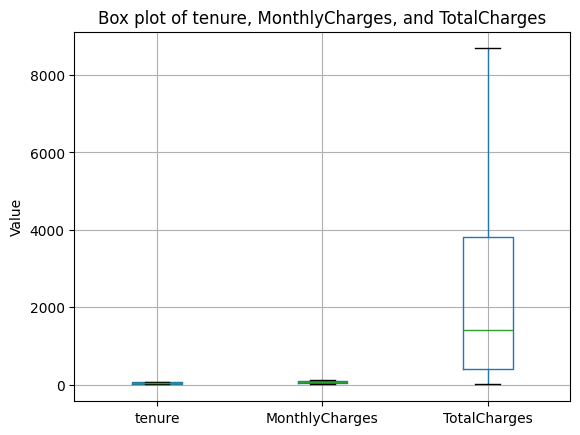

In [173]:
df.boxplot(column=['tenure', 'MonthlyCharges', 'TotalCharges'])
plt.title('Box plot of tenure, MonthlyCharges, and TotalCharges')
plt.ylabel('Value')
plt.show()

In [174]:
# no outliers are seen

**Data Visualization**

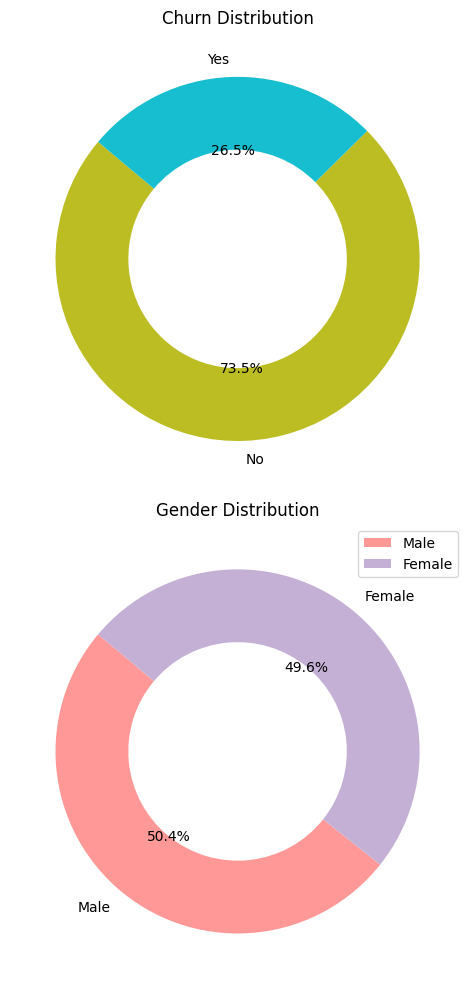

In [175]:
# Calculate the counts for 'Churn' and 'gender'
churn_counts = df['Churn'].value_counts()
gender_counts = df['gender'].value_counts()

# Define colors for the pie charts
colors_churn = ['#bcbd22', '#17becf']
colors_gender = ['#ff9896', '#c5b0d5']

# Set up the figure
plt.figure(figsize=(8, 10))

# Plot the first donut chart for 'Churn'
plt.subplot(2, 1, 1)  # (rows, columns, position)
plt.pie(churn_counts, labels=churn_counts.index, autopct='%1.1f%%', startangle=140, colors=colors_churn, wedgeprops=dict(width=0.4))
plt.title('Churn Distribution')

# Plot the second donut chart for 'Gender'
plt.subplot(2, 1, 2)  # (rows, columns, position)
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=140, colors=colors_gender, wedgeprops=dict(width=0.4))
plt.title('Gender Distribution')

# Add a legend and display the plots
plt.legend()
plt.tight_layout()
plt.show()

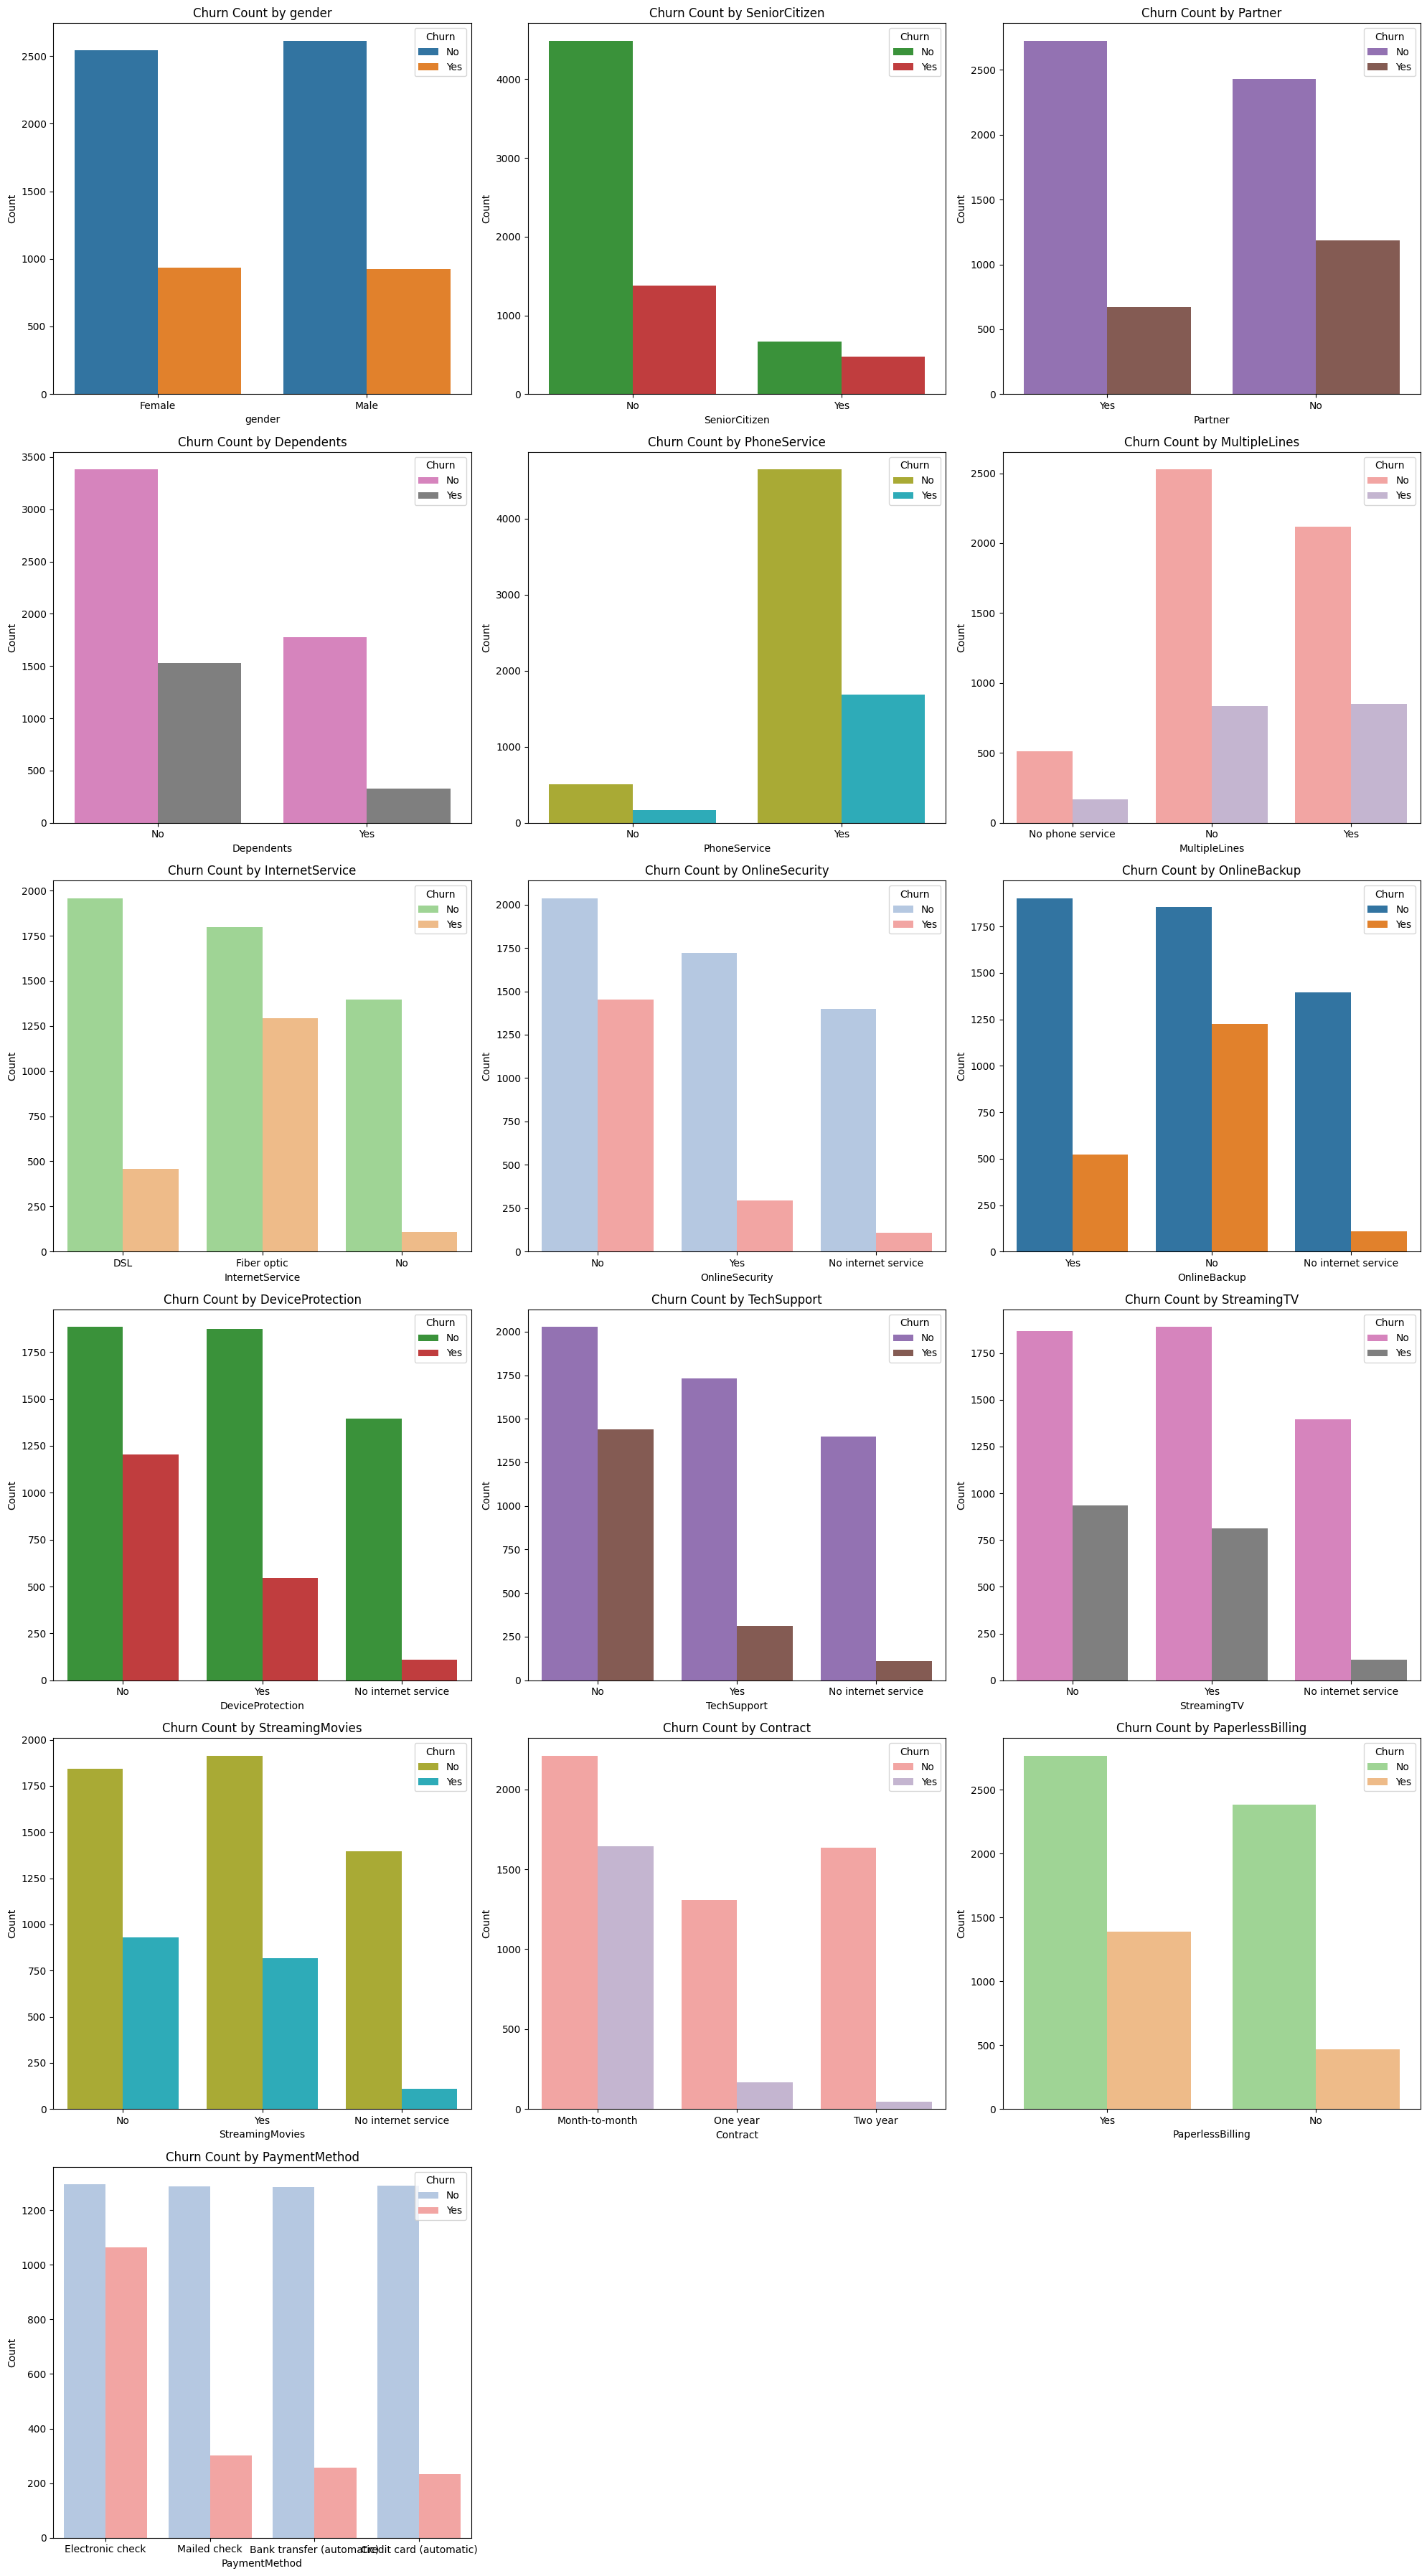

In [176]:


import seaborn as sns
import matplotlib.pyplot as plt

# Sample DataFrame
# df = pd.read_csv('your_churn_data.csv')

# List of columns to plot against 'Churn'
columns_to_plot = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
                   'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                   'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
                   'PaymentMethod']

# Determine the number of rows and columns for the subplots grid
num_plots = len(columns_to_plot)
num_cols = 3  # Number of columns for the subplot grid
num_rows = (num_plots + num_cols - 1) // num_cols  # Calculate the number of rows needed

# Create the subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, num_rows * 6))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Define a set of contrasting color pairs
color_pairs = [
    ['#1f77b4', '#ff7f0e'],  # Blue and Orange
    ['#2ca02c', '#d62728'],  # Green and Red
    ['#9467bd', '#8c564b'],  # Purple and Brown
    ['#e377c2', '#7f7f7f'],  # Pink and Gray
    ['#bcbd22', '#17becf'],  # Olive and Cyan
    ['#ff9896', '#c5b0d5'],  # Light Red and Lavender
    ['#98df8a', '#ffbb78'],  # Light Green and Light Orange
    ['#aec7e8', '#ff9896'],  # Light Blue and Light Red
]

# Create count plots for each column against 'Churn'
for idx, column in enumerate(columns_to_plot):
    color_pair = color_pairs[idx % len(color_pairs)]
    sns.countplot(ax=axes[idx], x=column, hue='Churn', data=df, palette=color_pair)  # Use contrasting color pairs
    axes[idx].set_title(f'Churn Count by {column}')
    axes[idx].set_xlabel(column)
    axes[idx].set_ylabel('Count')
    axes[idx].legend(title='Churn')

# Remove any unused subplots
for ax in axes[num_plots:]:
    ax.remove()

plt.tight_layout()
plt.show()

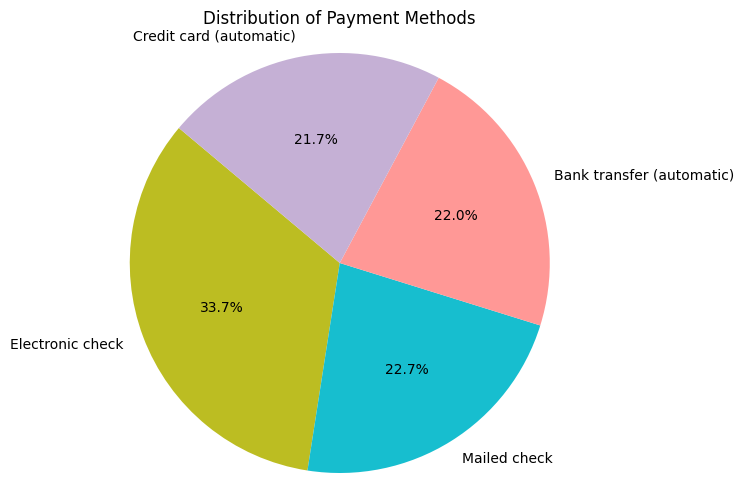

In [177]:
import matplotlib.pyplot as plt

# Calculate the counts of each payment method
payment_counts = df['PaymentMethod'].value_counts()
color_pairs = ['#bcbd22', '#17becf', '#ff9896', '#c5b0d5']

# Plotting the pie chart
plt.figure(figsize=(8, 6))
plt.pie(payment_counts, labels=payment_counts.index, autopct='%1.1f%%', startangle=140, colors=color_pairs)
plt.title('Distribution of Payment Methods')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()



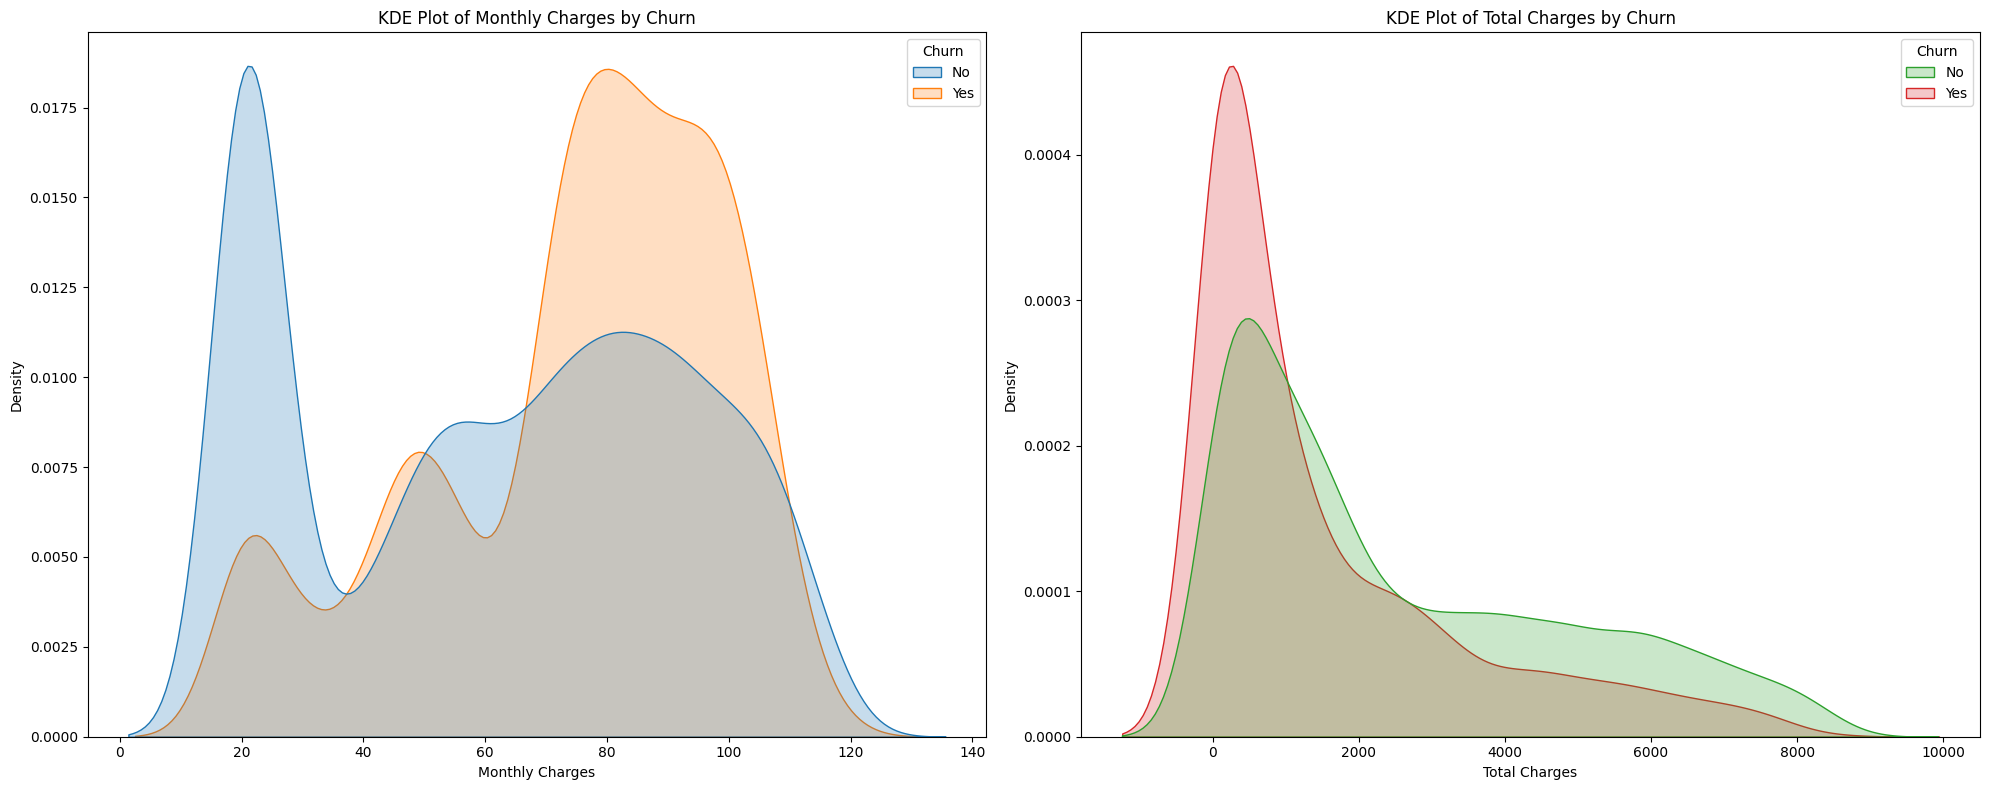

In [178]:
fig, axes = plt.subplots(1, 2, figsize=(20, 8))

sns.kdeplot(ax=axes[0], data=df, x='MonthlyCharges', hue='Churn', fill=True, common_norm=False, palette=['#1f77b4', '#ff7f0e'])
axes[0].set_title('KDE Plot of Monthly Charges by Churn')
axes[0].set_xlabel('Monthly Charges')
axes[0].set_ylabel('Density')

# KDE plot for TotalCharges
sns.kdeplot(ax=axes[1], data=df, x='TotalCharges', hue='Churn', fill=True, common_norm=False, palette=['#2ca02c', '#d62728'])
axes[1].set_title('KDE Plot of Total Charges by Churn')
axes[1].set_xlabel('Total Charges')
axes[1].set_ylabel('Density')
plt.tight_layout()
plt.show()

C:\Users\AKSHAYA REDDY\AppData\Local\Temp\ipykernel_28052\2355709476.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y='tenure', data=df, palette=['#1f77b4', '#ff7f0e'])


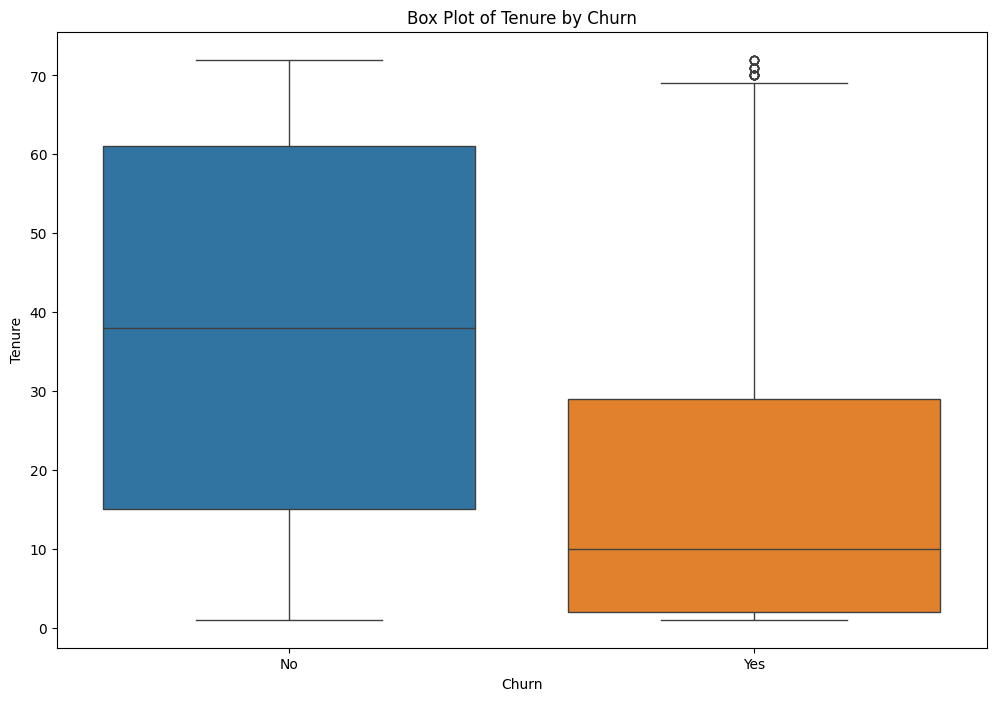

In [179]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='Churn', y='tenure', data=df, palette=['#1f77b4', '#ff7f0e'])
plt.title('Box Plot of Tenure by Churn')
plt.xlabel('Churn')
plt.ylabel('Tenure')
plt.show()

DATA PREPROCESSING

In [180]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,No,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [181]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [182]:
def object_to_int(dataframe_series):
    if dataframe_series.dtype=='object':
        dataframe_series = LabelEncoder().fit_transform(dataframe_series)
    return dataframe_series
df = df.apply(lambda x: object_to_int(x))
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


In [183]:
X = df.drop(columns = ['Churn'])
y = df['Churn'].values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled,y,test_size = 0.30, random_state = 40)

MODELING AND PARAMETER OPTIMIZATION

In [184]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sn
import numpy as np


In [185]:
results = {
    'Model': [],
    'Avg Score': [],
}

Logistic Regression
Cross-Validation Scores: [0.79837067 0.79531568 0.79816514 0.80632008 0.80530071]
avg Cross-Validation Score: 0.8063200815494393
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.89      0.87      1548
           1       0.65      0.58      0.62       555

    accuracy                           0.81      2103
   macro avg       0.75      0.74      0.74      2103
weighted avg       0.80      0.81      0.80      2103



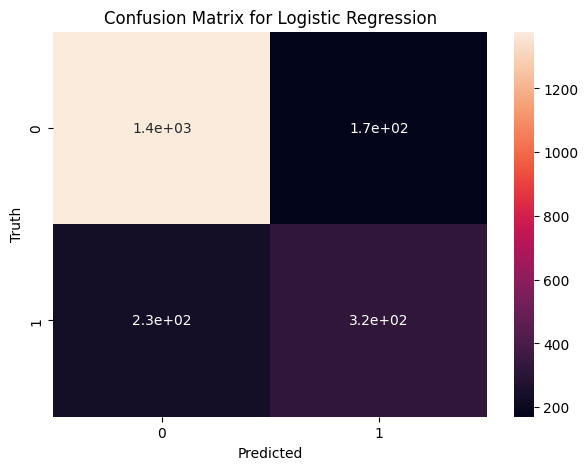

In [186]:
# Logistic Regression
lr = LogisticRegression()
lr.fit(X_train, y_train)

# Cross-validation scores
lr_cv_scores = cross_val_score(lr, X_train, y_train, cv=5)
lr_avg_score = np.average(lr_cv_scores)

# Predictions and evaluation
y_pred_lr = lr.predict(X_test)
lr_classification_report = classification_report(y_test, y_pred_lr)
cm = confusion_matrix(y_test, y_pred_lr)

# Print results
print("Logistic Regression")
print("Cross-Validation Scores:", lr_cv_scores)
print("avg Cross-Validation Score:", lr_best_score)
print("Classification Report:\n", lr_classification_report)
plt.figure(figsize=(7,5))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title('Confusion Matrix for Logistic Regression')

# Store results
results['Model'].append('Logistic Regression')
results['Avg Score'].append(lr_avg_score)


SVM
Cross-Validation Scores: [0.79633401 0.78615071 0.79001019 0.78593272 0.78797146]
Average Cross-Validation Score: 0.7892798196279204
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.91      0.87      1548
           1       0.68      0.51      0.58       555

    accuracy                           0.81      2103
   macro avg       0.76      0.71      0.73      2103
weighted avg       0.80      0.81      0.80      2103



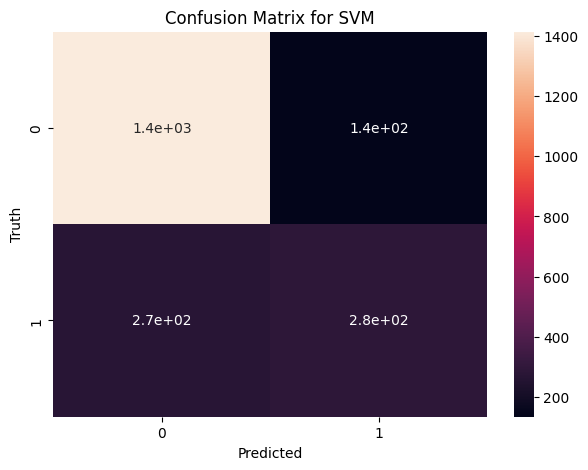

In [187]:
# SVM
svm = SVC()
svm.fit(X_train, y_train)

# Cross-validation scores
svm_cv_scores = cross_val_score(svm, X_train, y_train, cv=5)
svm_avg_score = np.average(svm_cv_scores)

# Predictions and evaluation
y_pred_svm = svm.predict(X_test)
svm_classification_report = classification_report(y_test, y_pred_svm)
cm = confusion_matrix(y_test, y_pred_svm)

# Print results
print("SVM")
print("Cross-Validation Scores:", svm_cv_scores)
print("Average Cross-Validation Score:", svm_avg_score)
print("Classification Report:\n", svm_classification_report)
plt.figure(figsize=(7, 5))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title('Confusion Matrix for SVM')
plt.show()

# Store results
results['Model'].append('SVM')
results['Avg Score'].append(svm_avg_score)


Decision Tree
Cross-Validation Scores: [0.73217923 0.71486762 0.71763507 0.73292559 0.7196738 ]
Average Cross-Validation Score: 0.7234562595630628
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.81      0.81      1548
           1       0.49      0.51      0.50       555

    accuracy                           0.73      2103
   macro avg       0.65      0.66      0.66      2103
weighted avg       0.73      0.73      0.73      2103



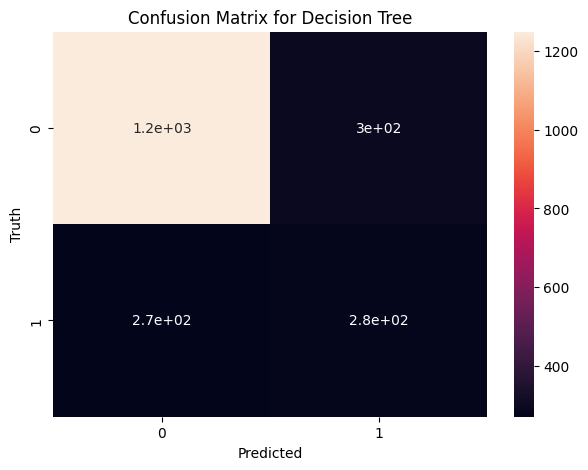

In [188]:
# Decision Tree
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

# Cross-validation scores
dt_cv_scores = cross_val_score(dt, X_train, y_train, cv=5)
dt_avg_score = np.average(dt_cv_scores)

# Predictions and evaluation
y_pred_dt = dt.predict(X_test)
dt_classification_report = classification_report(y_test, y_pred_dt)
cm = confusion_matrix(y_test, y_pred_dt)

# Print results
print("Decision Tree")
print("Cross-Validation Scores:", dt_cv_scores)
print("Average Cross-Validation Score:", dt_avg_score)
print("Classification Report:\n", dt_classification_report)
plt.figure(figsize=(7, 5))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title('Confusion Matrix for Decision Tree')
plt.show()

# Store results
results['Model'].append('Decision Tree')
results['Avg Score'].append(dt_avg_score)


Random Forest
Cross-Validation Scores: [0.78615071 0.7688391  0.78083588 0.79102956 0.7930683 ]
Average Cross-Validation Score: 0.7839847115562282
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.89      0.86      1548
           1       0.63      0.53      0.58       555

    accuracy                           0.79      2103
   macro avg       0.74      0.71      0.72      2103
weighted avg       0.79      0.79      0.79      2103



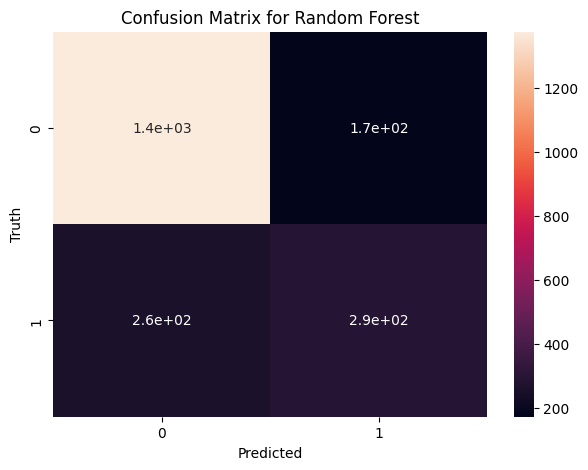

In [189]:
# Random Forest
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

# Cross-validation scores
rf_cv_scores = cross_val_score(rf, X_train, y_train, cv=5)
rf_avg_score = np.average(rf_cv_scores)

# Predictions and evaluation
y_pred_rf = rf.predict(X_test)
rf_classification_report = classification_report(y_test, y_pred_rf)
cm = confusion_matrix(y_test, y_pred_rf)

# Print results
print("Random Forest")
print("Cross-Validation Scores:", rf_cv_scores)
print("Average Cross-Validation Score:", rf_avg_score)
print("Classification Report:\n", rf_classification_report)
plt.figure(figsize=(7, 5))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title('Confusion Matrix for Random Forest')
plt.show()

# Store results
results['Model'].append('Random Forest')
results['Avg Score'].append(rf_avg_score)


KNN
Cross-Validation Scores: [0.74338086 0.75356415 0.73394495 0.74617737 0.72579001]
Average Cross-Validation Score: 0.7405714689072002
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.84      0.84      1548
           1       0.54      0.54      0.54       555

    accuracy                           0.76      2103
   macro avg       0.69      0.69      0.69      2103
weighted avg       0.76      0.76      0.76      2103



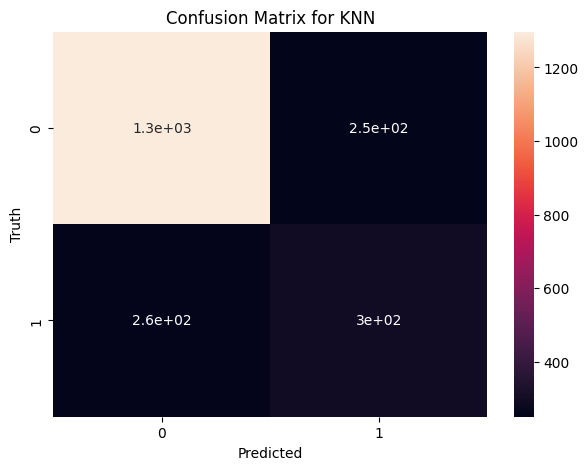

In [190]:
# KNN
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

# Cross-validation scores
knn_cv_scores = cross_val_score(knn, X_train, y_train, cv=5)
knn_avg_score = np.average(knn_cv_scores)

# Predictions and evaluation
y_pred_knn = knn.predict(X_test)
knn_classification_report = classification_report(y_test, y_pred_knn)
cm = confusion_matrix(y_test, y_pred_knn)

# Print results
print("KNN")
print("Cross-Validation Scores:", knn_cv_scores)
print("Average Cross-Validation Score:", knn_avg_score)
print("Classification Report:\n", knn_classification_report)
plt.figure(figsize=(7, 5))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title('Confusion Matrix for KNN')
plt.show()

# Store results
results['Model'].append('KNN')
results['Avg Score'].append(knn_avg_score)


In [192]:
results_df = pd.DataFrame(results)
results_df


,Model,Avg Score
0,Logistic Regression,0.800694
1,SVM,0.789280
2,Decision Tree,0.723456
3,Random Forest,0.783985
4,KNN,0.740571
